<figure>
  <IMG SRC="http://www.intraperso.univ-nantes.fr/uas/intraperso/LOGO/logo%20un2012blanc_larg40.png" WIDTH=250 ALIGN="right">
</figure>

# Distanciel X1MF020 : Théorie des Probabilités avancée
*P. Carmona*

Pour avancer dans le notebook et exécuter les cellules il faut taper Shift+Enter ou utiliser la barre d'outils ci-dessus et choisir Cell, Run Cell and select Below

## Consignes

Vous répondrez aux questions qui apparaissent en $\color{red} {rouge}$ en modifiant ce notebook. En insérant des cellules de type Markdown pour le texte et des cellules de type Code pour le code. Normalement vous devriez pouvoir vous contenter des cellules prévues en dessous de chaque question : certaines en markdown pour le texte et d'autres en Code pour les codes. 

Ensuite vous sauvez ce notebook sous le nom Prenom_Nom_tpmasterproba.ipynb et vous le déposez sur Madoc.

## Validation d'un générateur aléatoire

### Variables aléatoires à densité

On dispose d'un échantillon que l'on pense être l'échantillon d'une loi normale centrée réduite. On
désire valider graphiquement ce fait.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy.random as rnd
%matplotlib inline


#from np.random import *
x=rnd.randn(10000)
x

array([-0.04751595,  1.52879755, -0.48509082, ..., -1.12344728,
       -0.98849042, -1.95847896])

Une première idée est de dire que vu que l'on a tiré beaucoup de
points, $n=10000$, un histogramme devrait être proche de la fonction
densité.

Regardons donc comment dessiner un histogramme.

(array([  13.,  123.,  602., 1590., 2539., 2761., 1565.,  626.,  154.,
          27.]),
 array([-3.6300531 , -2.90686694, -2.18368077, -1.46049461, -0.73730845,
        -0.01412228,  0.70906388,  1.43225004,  2.1554362 ,  2.87862237,
         3.60180853]),
 <a list of 10 Patch objects>)

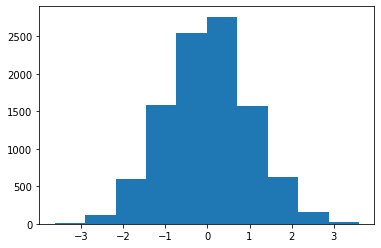

In [2]:
plt.hist(x)

Si l'on tape ?hist on a une aide sur la fonction histogramme. Par exemple, on peut nettement améliorer l'histogramme en utilisant la fonction hist du paquetage plt: 

C:\Users\maeva\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


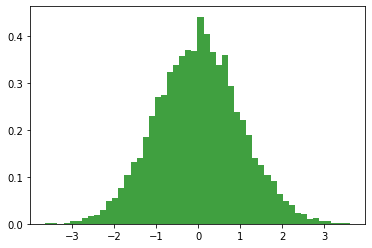

In [3]:
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)

In [4]:
bins

array([-3.6300531 , -3.48541587, -3.34077863, -3.1961414 , -3.05150417,
       -2.90686694, -2.7622297 , -2.61759247, -2.47295524, -2.32831801,
       -2.18368077, -2.03904354, -1.89440631, -1.74976908, -1.60513184,
       -1.46049461, -1.31585738, -1.17122015, -1.02658291, -0.88194568,
       -0.73730845, -0.59267122, -0.44803398, -0.30339675, -0.15875952,
       -0.01412228,  0.13051495,  0.27515218,  0.41978941,  0.56442665,
        0.70906388,  0.85370111,  0.99833834,  1.14297558,  1.28761281,
        1.43225004,  1.57688727,  1.72152451,  1.86616174,  2.01079897,
        2.1554362 ,  2.30007344,  2.44471067,  2.5893479 ,  2.73398513,
        2.87862237,  3.0232596 ,  3.16789683,  3.31253406,  3.4571713 ,
        3.60180853])


Regardons donc maintenant comment tracer la fonction densité
gaussienne standard. On la trace sur l'intervalle [-5,5].
$\color{red} {\text{Pourquoi
est-ce suffisant ?}}$


C'est suffisant car la première barre de l'histogramme ci-dessus est à -4,24 environ et la dernière se trouve à 4,73 environ.

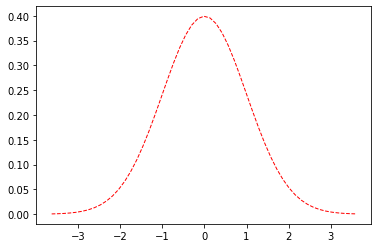

In [5]:
from scipy.stats import norm
mu,sigma=0,1

#Ma version de matplotlib ne possède pas normpdf donc j'ai dû le faire avec scipy.stats.norm
#y = mlab.normpdf( bins, mu, sigma)
y = norm.pdf(bins, mu, sigma)

l = plt.plot(bins, y, 'r--', linewidth=1)

Superposons les deux graphiques

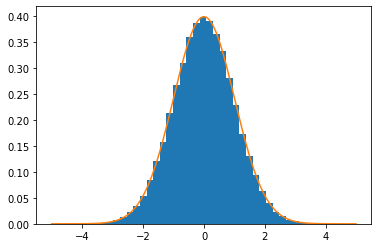

In [6]:
x=rnd.randn(100000)
plt.hist(x,40,density=True)
tt=np.arange(start=-5,stop=+5,step=0.01)
plt.plot(tt, norm.pdf(tt,0,1))


### Variables aléatoires discrètes 
Lorsque l'on dispose d'un échantillon d'une loi de discrète, par
exemple la loi de Poisson, nous  pouvons encore comparer l'histogramme
à la densité. Mais cela ne donne pas toujours des résultats convaincants. Jouez avec les paramètres de l'histogramme pour vous en convaincre.

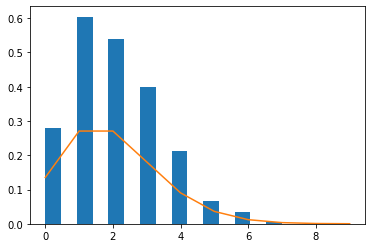

In [7]:
import scipy

from scipy import stats 

x=rnd.poisson(lam=2,size=1000)
plt.hist(x,15, density=True)
z=scipy.stats.poisson
plt.plot(np.arange(10),z.pmf(np.arange(10),2))

 Il n'est pas toujours facile de jouer avec les histogrammes. Voila
 pourquoi nous allons  introduire la
fonction de répartition empirique. Si $X_1, \ldots, X_n$ sont des
variables indépendantes de même loi, alors la fonction de répartion 
$$ F_n(x)=F_n(x,\omega) = \frac{1}{n} \sum_{1\le i\le n} 1_{X_i(\omega)
  \le x}$$
est en fait la fonction de répartition de la variable aléatoire
$\mu_n(\omega)$ à valeurs probabilité, $\mu_n(\omega)= \frac{1}{n}
\sum_{1\le i\le n} \delta_{X_i(\omega)}$ qui est appelée loi empirique
de l'échantillon $(X_1, \ldots, X_n)$. Par la loi forte des grands
nombres, à $x$ réel fixé, on a la convergence presque sûre
$$ F_n(x,\omega) \to F(x)\, p.s.$$
où $F$ est la fonction de répartition de la loi commune des $X_i$.

Si la fonction $F$ est continue, alors il découle presque immédiatement du
 second lemme de Dini que la convergence est uniforme. En fait, il n'y
 a pas besoin que $F$ soit continue, c'est le théorème de
 Glivenko-Cantelli: presque sûrement $\sup_{x\in \mathbb{R}}
\left|F_n(x,\omega) -F(x)\right|$ converge vers 0.


On peut également montrer que la vitesse de convergence est de l'ordre
de $\sqrt{n}$. Andrei Kolmogorov a montré que 
$\sqrt{n} \sup_{x\in\mathbb{R}}
\left|F_n(x,\omega) -F(x)\right|$ convergeait en loi vers une variable aléatoire  $K$ dont
la loi, appellée loi de Kolmogorov Smirnov, ne dépend pas de la loi de $X_1$.


Voici une fonction qui dessine la fonction de répartition empirique

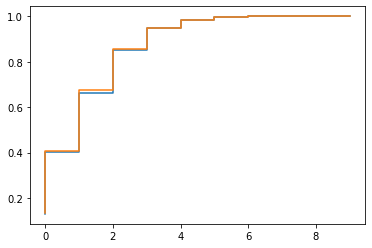

In [8]:
import statsmodels
from statsmodels.distributions.empirical_distribution import ECDF

x=rnd.poisson(lam=2,size=1000)
ecdf=ECDF(x)
plt.step(range(10),ecdf(range(10)))
plt.step(np.arange(10),z.cdf(np.arange(10),2))

  ### Les Moments
  Il s'agit de comparer les moments empiriques aux moments de la loi
cible.
On se contente souvent de la moyenne et de la variance empirique.


In [9]:
x=rnd.poisson(lam=3,size=1000)
x.mean(), x.var()

(3.003, 2.884991)

### Méthode de la fonction quantile

Reprendre le cours et/ou le TD qui expliquent la méthode.

$\color{red}{\text{Ecrire une fonction appelée}}$ $\color{green}{genexp}$ $\color{red}{\text{qui prend pour paramètres }}$ $\color{red}{n\in\mathbb{N}^*}$ $\color{red}{\text{et}}$ $\color{red}{l>0}$ 
$ \color{red}{\text{et
  qui retourne un échantillon de taille}}$ $\color{red}{n}$ $\color{red}{\text{de loi exponentielle de
  paramètre}}$ $\color{red}{l>0}$. 
  
  $\color{red}{\text{ATTENTION: vous devez utiliser la méthode de la
  fonction quantile}},$
  $\color{red}{\text{pas la fonction rnd.exponential de la bibliothèque.}}$
  
  Voici en exemple une fonction qui retourne un echantillon de $n$ uniformes sur $[0,u]$. N'oubliez pas l'indentation chère à Python.

In [10]:
def munif(n,u):
    x=rnd.uniform(low=0.0,high=u,size=n)
    return(x)

munif(10,2)

array([0.253438  , 1.20337006, 0.83011171, 0.62979657, 0.52952203,
       0.99152154, 0.34998878, 1.65761562, 0.84631381, 0.13794814])

In [11]:
def genexp(n,l):
    u = munif(n,1)
    x =-(1/l)*(np.log(1-u))
    return x

$\color{red}{\text{Appliquer la fonction}}$ $\color{green} {genexp}$ $\color{red}{\text{pour}}$ $\color{red} {l=2.5}$ $\color{red}{\text{et simuler un échantillon
  de taille}}$  $\color{red} {n=100}$.
  - $\color{red}{\text{tracer l'histogramme de l'échantillon}}$
  - $\color{red}{\text{superposer la densité de la loi exponentielle de paramètre}}$ 
  $\color{red} {l}$
  - $\color{red}{\text{Calculer l'espérance de la loi et la comparer avec la moyenne
    de l'échantillon simulé}}$ 
  - $\color{red}{\text{Calculer la variance de la loi et la comparer avec la
    variance de l'échantillon simulé.}}$

$\color{red}{\text{Recommencer avec}}$ $\color{red} {n=5000}$ $\color{red}{\text{puis}}$ $\color{red} {n=100 000}$.
 
 #### Consigne
 Insérez autant de cellules dont vous avez besoin en dessous de celle-ci pour réponre aux questions. Il existe deux types de cellule : markdown (text) et code (du code).

(array([1.91484143, 1.4642905 , 1.68956597, 1.4642905 , 1.12637731,
        0.78846412, 0.45055092, 0.56318866, 0.33791319, 0.45055092,
        0.11263773, 0.22527546, 0.11263773, 0.        , 0.        ,
        0.22527546, 0.        , 0.11263773, 0.        , 0.22527546]),
 array([0.00273781, 0.09151801, 0.1802982 , 0.2690784 , 0.3578586 ,
        0.4466388 , 0.53541899, 0.62419919, 0.71297939, 0.80175959,
        0.89053978, 0.97931998, 1.06810018, 1.15688038, 1.24566057,
        1.33444077, 1.42322097, 1.51200116, 1.60078136, 1.68956156,
        1.77834176]),
 <a list of 20 Patch objects>)

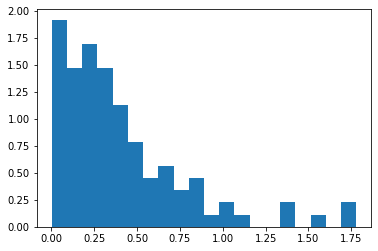

In [12]:
# Histogramme de l'échantillon pour l=2,5 et n=100
n_100 = 100
l = 2.5

x_quantile = genexp(n_100, l)
plt.hist(x_quantile, bins=20, density=True)

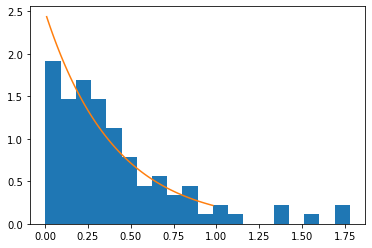

In [13]:
# Superposition de l'histogramme de l'échantillon et de la densité de la loi exponentielle de paramètre l
plt.hist(x_quantile, bins=20, density=True)

x = np.arange(start=0.01,stop=0.99,step=0.01)
y = stats.expon.pdf(x,loc=0,scale=(1/l))
plt.plot(x, y)

In [14]:
#Espérance de la loi et moyenne de l'échantillon simulé
print("L'espérance de la loi vaut : ", stats.expon.mean(loc=0, scale=(1/l)))
print("La moyenne de l'échantillon simulé vaut : ", x_quantile.mean())
print("L'espérance théorique vaut : ", 1/l)

L'espérance de la loi vaut :  0.4
La moyenne de l'échantillon simulé vaut :  0.4062859079395447
L'espérance théorique vaut :  0.4


Pour n=100, l'échantillon simulé a une moyenne proche de l'espérance de la loi (0.41 au lieu de 0.4).

In [15]:
# Variances
print("La variance de la loi vaut : ", stats.expon.var(loc=0, scale=(1/l)))
print("La variance de l'échantillon simulé vaut : ", x_quantile.var())
print("La variance théorique vaut : ", 1/(l**2))

La variance de la loi vaut :  0.16000000000000003
La variance de l'échantillon simulé vaut :  0.13980046199209567
La variance théorique vaut :  0.16


Pour n=100, la variance de l'échantillon simulé est proche de la variance de la loi (0.159 au lieu de 0.16).

L'espérance de la loi vaut :  0.4
La moyenne de l'échantillon simulé vaut :  0.40240999889772766
L'espérance théorique vaut :  0.4
La variance de la loi vaut :  0.16000000000000003
La variance de l'échantillon simulé vaut :  0.16649798940617266
La variance théorique vaut :  0.16


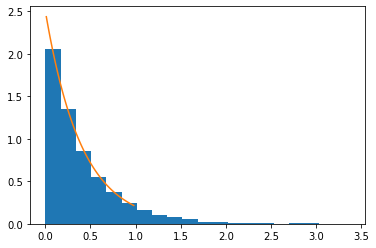

In [16]:
# Histogramme de l'échantillon pour l=2,5 et n=5000
n_5000 = 5000
x_quantile = genexp(n_5000, l)
plt.hist(x_quantile, bins=20, density=True)

# Densité de la loi exponentielle de paramètre l
x = np.arange(start=0.01,stop=0.99,step=0.01)
y = stats.expon.pdf(x,loc=0,scale=(1/l))
plt.plot(x, y)

#Espérance de la loi et moyenne de l'échantillon simulé
print("L'espérance de la loi vaut : ", stats.expon.mean(loc=0, scale=(1/l)))
print("La moyenne de l'échantillon simulé vaut : ", x_quantile.mean())
print("L'espérance théorique vaut : ", 1/l)

# Variances
print("La variance de la loi vaut : ", stats.expon.var(loc=0, scale=(1/l)))
print("La variance de l'échantillon simulé vaut : ", x_quantile.var())
print("La variance théorique vaut : ", 1/(l**2))

La moyenne et la variance de l'échantillon simulé sont plus proches de l'espérance et de la variance de la loi pour n=5000 que pour n=100.

L'espérance de la loi vaut :  0.4
La moyenne de l'échantillon simulé vaut :  0.39969078626873544
L'espérance théorique vaut :  0.4
La variance de la loi vaut :  0.16000000000000003
La variance de l'échantillon simulé vaut :  0.15856059897577052
La variance théorique vaut :  0.16


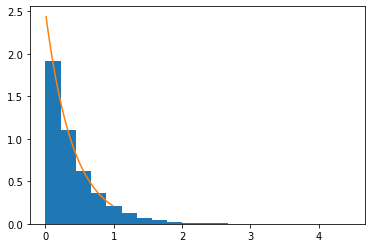

In [17]:
# Histogramme de l'échantillon pour l=2,5 et n=100000
n_100000 = 100000
x_quantile = genexp(n_100000, l)
plt.hist(x_quantile, bins=20, density=True)

# Densité de la loi exponentielle de paramètre l
x = np.arange(start=0.01,stop=0.99,step=0.01)
y = stats.expon.pdf(x,loc=0,scale=(1/l))
plt.plot(x, y)

#Espérance de la loi et moyenne de l'échantillon simulé
print("L'espérance de la loi vaut : ", stats.expon.mean(loc=0, scale=(1/l)))
print("La moyenne de l'échantillon simulé vaut : ", x_quantile.mean())
print("L'espérance théorique vaut : ", 1/l)

# Variances
print("La variance de la loi vaut : ", stats.expon.var(loc=0, scale=(1/l)))
print("La variance de l'échantillon simulé vaut : ", x_quantile.var())
print("La variance théorique vaut : ", 1/(l**2))

Finalement, plus l'échantillon est de grande taille (n grand), plus l'échantillon simulé est proche de la loi exponentielle de paramètre l.

$\color{red}{\text{Reprendre les mêmes questions avec la loi de Cauchy standard qui
  admet pour densité}}$ $\color{red}{\frac{1}{\pi(1+x^2)}.}$  
  
  - $\color{red}{\text{ Que remarquez vous ?}}$
  - $\color{red}{\text{ Utiliser en plus le
  théorème de Glivenko-Cantelli pour valider  votre générateur.}}$

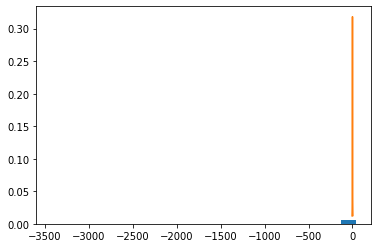

In [18]:
def gencauchy(n):
    u = munif(n,1)
    x = np.tan((np.pi)*u-((np.pi)/2))
    return x

# Histogramme de l'échantillon pour n=100
n_100 = 100
x_quantile_cauchy = gencauchy(n_100)
plt.hist(x_quantile_cauchy, bins=20, density=True)

# Densité de la loi de Cauchy
x_cauchy = np.arange(start=-5,stop=5,step=0.1)
y_cauchy = stats.cauchy.pdf(x_cauchy)
plt.plot(x_cauchy, y_cauchy)

In [19]:
#Espérance de la loi et moyenne de l'échantillon simulé
print("L'espérance de la loi vaut : ", stats.cauchy.mean())
print("La moyenne de l'échantillon simulé vaut : ", x_quantile.mean())

# Variances
print("La variance de la loi vaut : ", stats.cauchy.var())
print("La variance de l'échantillon simulé vaut : ", x_quantile.var())

L'espérance de la loi vaut :  nan
La moyenne de l'échantillon simulé vaut :  0.39969078626873544
La variance de la loi vaut :  nan
La variance de l'échantillon simulé vaut :  0.15856059897577052


Je remarque que l'échantillon possède une moyenne de 1.39 alors que la loi n'admet pas d'espérance. De plus, l'échantillon possède une variance très élevée (88.4) alors que la loi n'admet pas de variance.

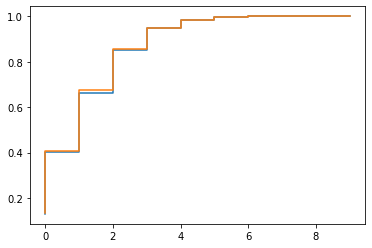

In [20]:
x_cauchy = rnd.standard_cauchy(size=n_100)

#Fonction de répartition empirique de la loi de Cauchy
ecdf_cauchy = ECDF(x_quantile_cauchy)

z_cauchy = stats.cauchy()

# Courbe bleu en escalier de la fonction de répartition empirique sur [0,10]
plt.step(range(10),ecdf(range(10)))

# Courbe orange en escalier de la fonction de répartition d'une loi de Cauchy sur [0,10]
plt.step(np.arange(10),z.cdf(np.arange(10),2))

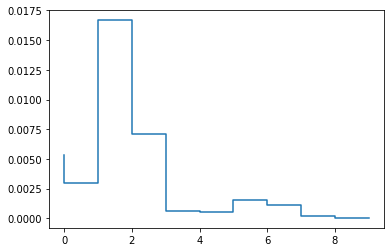

In [21]:
# Courbe de la valeur absolue de la différence entre la fonction de répartition empirique de l'échantillon simulé
#et la fonction de répartition de la loi de Cauchy
plt.step(range(10),np.abs(ecdf(range(10))-z.cdf(range(10),2)))

La borne supérieure de la valeur absolue de la différence entre la fonction de répartition empirique de l'échantillon simulé et la fonction de répartition de la loi de Cauchy tend vers 0 quand la taille de l'échantillon (n) tend vers l'infini. Ainsi, d'après le théorème de Glivenko-Cantelli, la fonction de répartition empirique de l'échantillon simulé concorde bien avec la fonction de répartition empirique de la loi de Cauchy et on peut valider notre générateur.